In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import nltk
import pycountry
import re
import string

In [2]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

OAuth 2 is a method of authentication where an application makes API requests without the user context. Use this method if you just need read-only access to public information.

In [3]:
api_key = 'Oj0YzcBrlTVcEUMD8S4PLkgf4'
api_secrets = 'YqtPSkTscjTndePvLGERs1j9KjDnZTTbdUlVV2UfAf2tHGvPfp'
access_token = '1556156526653743105-tAqU4wiooNq1sCzfpLBZbYzzLesdXQ'
access_token_secret = 'k5j7Oi8VPBgjF8fewEX6l9EkFAuD5T1YAJWxcWuctvKmT'

auth = tweepy.OAuthHandler(api_key, api_secrets)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\veda.nair\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
def percent(part,whole):
    percentage = (100 * float(part))/float(whole)

In [115]:
keyWord = input("Please enter the keyword you want to search: ")
no_of_tweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets,q=keyWord).items(no_of_tweet)

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percent(positive, no_of_tweet)
negative = percent(negative, no_of_tweet)
neutral = percent(neutral, no_of_tweet)
polarity = percent(polarity, no_of_tweet)

Please enter the keyword you want to search: FIFAWorldCup
Please enter how many tweets to analyze: 1000


In [116]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1000
positive number:  207
negative number:  29
neutral number:  764


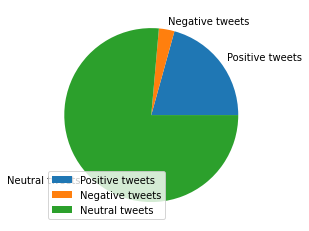

In [117]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([len(positive_list), len(negative_list), len(neutral_list)])

mylabels = ["Positive tweets", "Negative tweets", "Neutral tweets"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show()

In [118]:
tweet_list.head()

,0
0,ドイツの調子が上がる前に決めたいっすねー\n #FIFAWorldCup
1,📺Live Stream\n\n#GERJPN #Germany #Japan #World...
2,💥Watch Live Stream⚡ | FIFA World Cup Qatar 202...
3,もう既に防戦一方やね\n#FIFAWorldCup #Qatar2022 #JPN\n#SA...
4,RT @101greatgoals: Japan has the most wholesom...


In [119]:
tweet_list.drop_duplicates(inplace=True)
tweet_list.head()

,0
0,ドイツの調子が上がる前に決めたいっすねー\n #FIFAWorldCup
1,📺Live Stream\n\n#GERJPN #Germany #Japan #World...
2,💥Watch Live Stream⚡ | FIFA World Cup Qatar 202...
3,もう既に防戦一方やね\n#FIFAWorldCup #Qatar2022 #JPN\n#SA...
4,RT @101greatgoals: Japan has the most wholesom...


In [120]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features

tw_list = pd.DataFrame(tweet_list)
tw_list['text']=tw_list[0]

#Removing RT, Punctuation etc

remove_rt = lambda x: re.sub('RT @\w+:', " ", x)
rt = lambda x: re.sub('(@[A - Za - z0– 9] + ) | ([0-9 A - Za - z\ t]) | (\w + : \/\/\S+)',"",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.text[0]

'ドイツの調子が上がる前に決めたいっすねー\n #fifaworldcup'

In [121]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity','subjectivity']]=tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg= score['neg']
    neu= score['neu']
    pos= score['pos']
    comp= score['compound']
    if neg>pos:
        tw_list.loc[index,'sentiment']='negative'
    elif pos>neg:
        tw_list.loc[index,'sentiment']='positive'
    else:
        tw_list.loc[index,'sentiment']='neutral'
        
    tw_list.loc[index,'neg']=neg
    tw_list.loc[index,'pos']=pos
    tw_list.loc[index,'neu']=neu
    tw_list.loc[index,'compound']=comp
    
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,pos,neu,compound
0,ドイツの調子が上がる前に決めたいっすねー\n #FIFAWorldCup,ドイツの調子が上がる前に決めたいっすねー\n #fifaworldcup,0.000000,0.0,neutral,0.0,0.0,1.0,0.0
1,📺Live Stream\n\n#GERJPN #Germany #Japan #World...,📺live stream\n\n#gerjpn #germany #japan #world...,0.000000,0.0,neutral,0.0,0.0,1.0,0.0
2,💥Watch Live Stream⚡ | FIFA World Cup Qatar 202...,💥watch live stream⚡ | fifa world cup qatar 202...,0.136364,0.5,neutral,0.0,0.0,1.0,0.0
3,もう既に防戦一方やね\n#FIFAWorldCup #Qatar2022 #JPN\n#SA...,もう既に防戦一方やね\n#fifaworldcup #qatar2022 #jpn\n#sa...,0.000000,0.0,neutral,0.0,0.0,1.0,0.0
4,RT @101greatgoals: Japan has the most wholesom...,japan has the most wholesome fans 😂\n\n#fifa...,0.500000,0.5,neutral,0.0,0.0,1.0,0.0


In [122]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [123]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
neutral,689,85.17
positive,92,11.37
negative,28,3.46


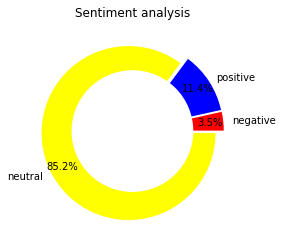

In [124]:
# Setting labels for items in Chart
sentiment = ['negative', 'positive', 'neutral']
  
# Setting size in Chart based on 
# given values
total = [len(tw_list_negative),len(tw_list_positive),len(tw_list_neutral)]
  
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(total, colors=colors, labels=sentiment,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Sentiment analysis')
  
# Displaying Chart
plt.show()

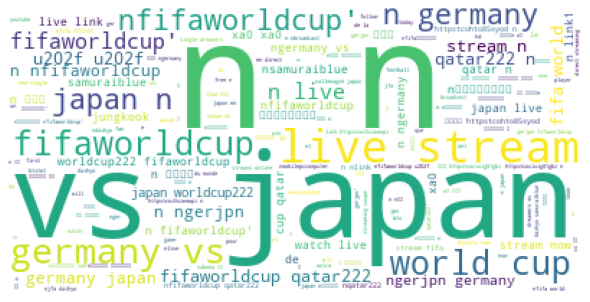

In [131]:
text=tw_list['punct'].values
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white',max_words=3000,stopwords=stopwords,repeat=True)
wc.generate(str(text))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

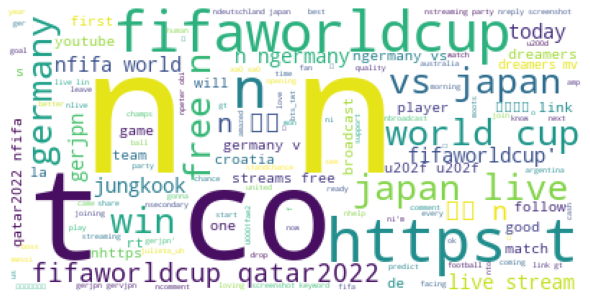

In [133]:
text=tw_list_positive['text'].values
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white',max_words=3000,stopwords=stopwords,repeat=True)
wc.generate(str(text))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

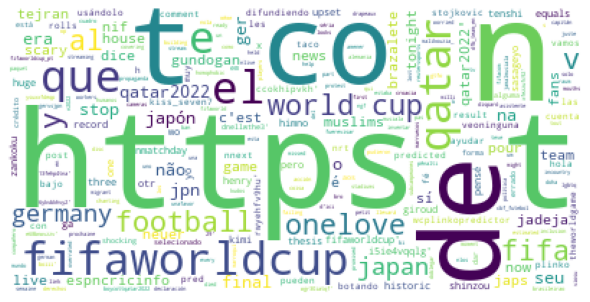

In [127]:
text=tw_list_negative['text'].values
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white',max_words=3000,stopwords=stopwords,repeat=True)
wc.generate(str(text))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [128]:
#Calculating tweet’s length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,120.18
neutral,83.85
positive,114.71


In [129]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.71
neutral,9.34
positive,16.54


Applying count vectorizer provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text. After count vectorizer, it is possible to analyze the words with two or three or whatever you want.

Applying stemmer is also provides the root of words. So you can eliminate words that come from the same root, such as ;

connect
connection
connected
connections
connects
comes from “connect”. If you apply the stemmer function, you can consider these all words as same

In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veda.nair\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [130]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,pos,neu,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,ドイツの調子が上がる前に決めたいっすねー\n #FIFAWorldCup,ドイツの調子が上がる前に決めたいっすねー\n #fifaworldcup,0.000000,0.0,neutral,0.0,0.0,1.0,0.0,35,2,ドイツの調子が上がる前に決めたいっすねー\n fifaworldcup,"[ドイツの調子が上がる前に決めたいっすねー, fifaworldcup]","[ドイツの調子が上がる前に決めたいっすねー, fifaworldcup]","[ドイツの調子が上がる前に決めたいっすねー, fifaworldcup]"
1,📺Live Stream\n\n#GERJPN #Germany #Japan #World...,📺live stream\n\n#gerjpn #germany #japan #world...,0.000000,0.0,neutral,0.0,0.0,1.0,0.0,129,13,📺live stream\n\ngerjpn germany japan worldcup2...,"[, live, stream, gerjpn, germany, japan, world...","[, live, stream, gerjpn, germany, japan, world...","[, live, stream, gerjpn, germani, japan, world..."
2,💥Watch Live Stream⚡ | FIFA World Cup Qatar 202...,💥watch live stream⚡ | fifa world cup qatar 202...,0.136364,0.5,neutral,0.0,0.0,1.0,0.0,139,17,💥watch live stream⚡ fifa world cup qatar 222\...,"[, watch, live, stream, fifa, world, cup, qata...","[, watch, live, stream, fifa, world, cup, qata...","[, watch, live, stream, fifa, world, cup, qata..."
3,もう既に防戦一方やね\n#FIFAWorldCup #Qatar2022 #JPN\n#SA...,もう既に防戦一方やね\n#fifaworldcup #qatar2022 #jpn\n#sa...,0.000000,0.0,neutral,0.0,0.0,1.0,0.0,63,6,もう既に防戦一方やね\nfifaworldcup qatar222 jpn\nsamurai...,"[もう既に防戦一方やね, fifaworldcup, qatar222, jpn, samu...","[もう既に防戦一方やね, fifaworldcup, qatar222, jpn, samu...","[もう既に防戦一方やね, fifaworldcup, qatar222, jpn, samu..."
4,RT @101greatgoals: Japan has the most wholesom...,japan has the most wholesome fans 😂\n\n#fifa...,0.500000,0.5,neutral,0.0,0.0,1.0,0.0,89,11,japan has the most wholesome fans 😂\n\nfifaw...,"[, japan, has, the, most, wholesome, fans, fif...","[, japan, wholesome, fans, fifaworldcup, qatar...","[, japan, wholesom, fan, fifaworldcup, qatar22..."


In [134]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

809 Number of reviews has 2836 words


,,abema,abematv,abemaで,abemaでfifaワ,abemaでfifaワールドカップ,aber,abertura,absurdo,acabar,...,𝗚𝗛𝗔𝗡𝗔,𝗠𝗔𝗧𝗖𝗛𝗗𝗔𝗬,𝗢𝗡,𝗣𝗢𝗥𝗧𝗨𝗚𝗔𝗟,𝗰𝗮𝗺𝗶𝘀𝗲𝘁𝗮,𝘼𝙡𝙚𝙧𝙩,𝘾𝙤𝙢𝙥𝙚𝙩𝙞𝙩𝙞𝙤𝙣,𝙇𝙄𝙑𝙀,𝟏,𝟐𝟎
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
,479
japan,247
live,246
germani,233
qatar,186
vs,179
stream,147
サッカー日本代表,112
fifa,97
cup,94


In [136]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('vs japan', 144),
 ('germany vs', 142),
 ('fifaworldcup qatar2022', 110),
 ('live stream', 107),
 ('world cup', 93),
 ('fifa world', 72),
 ('japan live', 63),
 ('germany japan', 55),
 ('link https', 54),
 ('fifaworldcup https', 52),
 ('gerjpn germany', 48),
 ('japan worldcup2022', 48),
 ('worldcup2022 fifaworldcup', 48),
 ('live link', 47),
 ('qatar 2022', 40),
 ('cup qatar', 39),
 ('stream fifa', 38),
 ('fifaworldcup サッカー日本代表', 37),
 ('link1 https', 36),
 ('𝐋𝐈𝐕𝐄 https', 36)]

In [137]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('germany vs japan', 142),
 ('fifa world cup', 72),
 ('vs japan live', 57),
 ('gerjpn germany japan', 48),
 ('germany japan worldcup2022', 48),
 ('japan worldcup2022 fifaworldcup', 48),
 ('worldcup2022 fifaworldcup qatar2022', 48),
 ('world cup qatar', 39),
 ('cup qatar 2022', 39),
 ('live stream fifa', 38),
 ('stream fifa world', 38),
 ('live link https', 33),
 ('live stream gerjpn', 31),
 ('stream gerjpn germany', 31),
 ('fifaworldcup qatar2022 germany', 31),
 ('qatar2022 germany vs', 31),
 ('vs japan link1', 31),
 ('japan link1 https', 31),
 ('2022 germany vs', 28),
 ('world cup 2022', 27)]